Distribuições de Probabilidades
======
`Modelar um evento é compreender como os dados são gerados e associar o processo gerador a métodos matemáticos e estatísticos que nos ajudem a descrever o evento. Para isso, precisamos entender distribuições de probabilidades, seus casos de uso e conceitos por trás das mesmas.`

___

Nesse notebook iremos nós monstrar algumas distribuições de probabilidades que podem ajudar na modelagem de diversos problemas encontrados na indústria ou na academia. O conteúdo desse notebook pode ser melhor explorado no livro bayesian modeling for hackers, que é a referência para meu estudo e fonte dos códigos para plots.



## Distribuição de Probabilidade


Primeiramente vamos entender o que é uma variável estocástica e uma variável determinística. De maneira bem simples :
* Variáveis estocásticas são variáveis que mesmo sabendo os valores de todos os parâmetros e componentes, ela ainda assim será aleatória. Por exemplo instâncias das classes Poisson, DiscreteUniform e Exponential ( classes do PyMC3. Iremos discutir posteriormente)

* Variáveis deterministicas são variáveis que podem ser determinadas caso v saibamos os outros parâmetros. Por exemplo, na fómula F = Ma, se soubermos a massa e a aceleração, então encontramos a força.

Dito isso, podemos então entender o que são distribuições de probabilidade.

Considere uma variável aleatória $Z$. Associada a $Z$, temos uma função que define probabilidades para os diferentes valores que $Z$ pode ter. Essa função é conhecida como *istribuição de probabilidade* e graficamente, ela representa a curva a probabilidade de um determinado resultado é proporcional à altura da curva. Veremos exemplos em seguida.

Podemos dividir variáveis aleatórias de 3 maneiras:

-   **$Z$ é discreta**: Somente assume valores dentro de uma lista específica. Como exemplos podemos citar, número de votos, quantidade de acessos a uma API por dia e etc.

-   **$Z$ é Contínua**: Pode assumir qualquer valor arbitrário. Por exemplo, temperatura, valocidade e tempo.

- **$Z$ é misturado**: Pode assumir valores discretos e contínuos. É uma combinação das duas variáveis acima. 


<br>

### Distribuição de Probabilidade Discreta

Se uma variável aleatória $Z$ é discreta, então sua distribuição dé conhecida como *função de massa de probabilidade (fmp)*. Essa função mede a probabilidade de $Z$ assumir o valor $k$, denotado $P(Z=k)$. Além disso, é importante notar que a função de massa de probabilidade possui a capacidade de completamente descrever a variável $Z$. Em outras palavras, se soubermos a fmp, então saberemos o comportamento de $Z$.


<br>

### Distribuição de Probabilidade Poisson

<br>

A primeira fmp que iremos introduzir é *Poisson*. Dizemos que $Z$ possui distribuição de *Poisson* se:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

* $\lambda$ É o parâmetro da distribuição e é ele que controla o formato da distribuição.
    * $\lambda$ pode assumir qualquer valor positivo
    * Aumentando o valor de $\lambda$, nós aumentamos a probabilidades de valores maiores
    * Diminuindo o valor de $\lambda$, nós diminuímos a probabilidades de valores menores
    * $\lambda$ também é conhecida como *intensidade* da distribuição de Poisson

* Diferente de  $\lambda$ que pode assumir qualquer valor positivo, $k$ é necessariamente um inteiro não negativo ( 0, 1, 2...)
    * O valor de $k$ faz total sentido pois não poderíamos ter 4,25 compras de um produto em um determinado dia.

Para a variável $Z$ com distribuição de Poisson, temos:

$$Z \sim \text{Poi}(\lambda) $$

Uma propriedade importante da distribuição de Poisson é que seu valor esperado ( expected value ) é igual ao seu parâmetro:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

<br>

Essa é uma propriedade importante de lembrar pois em muitas modelagens ela é utilizada. Nos plots abaixo, temos imagens duas fmp com $\lambda$ diferentes.Note que :
* Aumentando $\lambda$, adicionamos maior probabilidade de ocorrer valores mais altos


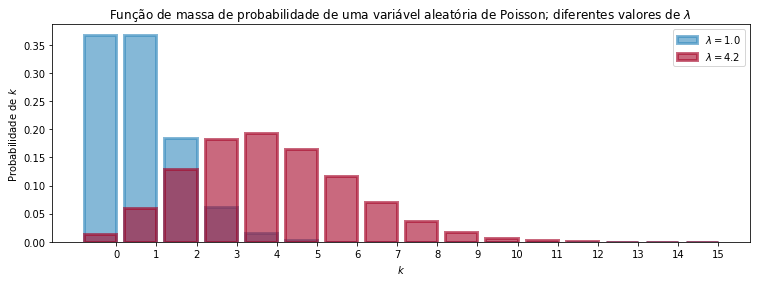

In [8]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

figsize(12.5, 4)
import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.0, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("Probabilidade de $k$")
plt.xlabel("$k$")
plt.title("Função de massa de probabilidade de uma variável aleatória de Poisson; diferentes valores de \
$\lambda$ ");

<br>

### Distribuição de Probabilidade Binomial

<br>

A distribuição binominal possui uma simplicidade e grande range de utilidades que fazem com que seja uma das distribuições mais utilizadas. Ela possui dois parâmetros: 
* $N$ - um valor inteiro positivo que representa o número de tentativas associadas a um evento
* $p$ - Probabilidade de sucesso em uma determinada tentativa

<br>

A distribuição somente aceita valores entre $0$ e $N$. Abaixo temos sua fdm:

$$P( X = k ) =  {{N}\choose{k}}  p^k(1-p)^{N-k}$$

<br>

Se $X$ é uma variável aleatória com distribuição binomial com parâmetros $p$ e $N$, então:

$$X \sim \text{Bin}(N,p)$$

<br>

* $X$ corresponde ao número de eventos que ocorreram em $N$ tentativas (  $0 \le X \le N$ )
* Quanto maior $p$, mais eventos são prováveis de ocorrer
* O valor esperado de uma binomial é $Np$

<br>

Abaixo temos os plots para diferentes parâmetros

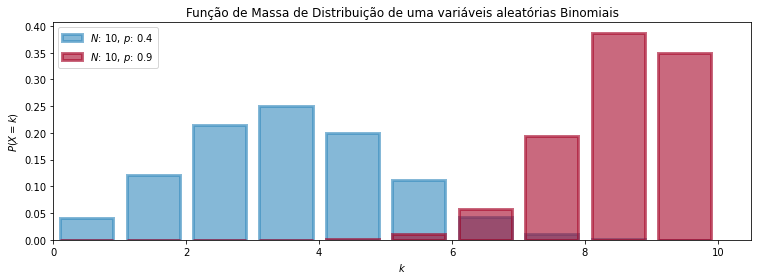

In [9]:
figsize(12.5, 4)

import scipy.stats as stats
binomial = stats.binom

parameters = [(10, .4), (10, .9)]
colors = ["#348ABD", "#A60628"]

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p), color=colors[i],
            edgecolor=colors[i],
            alpha=0.6,
            label="$N$: %d, $p$: %.1f" % (N, p),
            linewidth=3)

plt.legend(loc="upper left")
plt.xlim(0, 10.5)
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
plt.title("Função de Massa de Distribuição de uma variáveis aleatórias Binomiais");

<br>

Importante sobre a distribuição binomial:
* Quanto $N = 1$ ela corresponde a uma distribuição de Bernoulli
* Se $Z = X_1 + X_2 + ... + X_N \sim \text{Binomial}(N, p )$.
* O valor esperado de uma variável aleatória de Bernoulli é $p$

<br>

### Distribuição de Probabilidade Contínua
